In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:05<00:00, 197MB/s]
100% 1.06G/1.06G [00:05<00:00, 217MB/s]


In [ ]:
import zipfile  # Import Python's built-in zipfile module

# Open the ZIP file in read mode ('r')
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')

# Extract all files from the ZIP to '/content'
zip_ref.extractall('/content')

# Close the ZIP file to free system resources
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 5000 files belonging to 2 classes.


#Image Augmentation

In [ ]:
import tensorflow
import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
data_gen= ImageDataGenerator(
    rescale = 1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = data_gen.flow_from_directory(
    '/content/train',
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'
)

validation_ds = test_datagen.flow_from_directory(
    '/content/test',
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape=(256,256,3),padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))

model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same')) #Add new layer

model.add(Conv2D(128,kernel_size=(3,3),activation = 'relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))

model.add(Conv2D(256,kernel_size=(3,3),activation = 'relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience = 5,
    verbose=0,
    mode='min',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/model_epoch_{epoch:02d}.keras"  # Dynamic naming
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq="epoch",          # Save after every epoch
    verbose=1
)

In [ ]:
# Path to your saved model
model_path = "/content/drive/MyDrive/Colab Notebooks/model_epoch_30.keras"

# Load the model (includes architecture, weights, and optimizer state)
model = keras.models.load_model(model_path)

In [ ]:
aug_model = model.fit(
    train_generator,
    steps_per_epoch=20000 // 32,  # Fixed argument name (plural "steps")
    epochs=30,
    validation_data=validation_ds,
    validation_steps=5000 // 32,  # Ensure this matches your validation data size
    callbacks=[callback,checkpoint],
    initial_epoch=20
)

Epoch 21/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.9109 - loss: 0.2155
Epoch 21: saving model to /content/drive/MyDrive/Colab Notebooks/model_epoch_21.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 350s 560ms/step - accuracy: 0.9109 - loss: 0.2155 - val_accuracy: 0.9135 - val_loss: 0.2190
Epoch 22/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.9150 - loss: 0.2159
Epoch 22: saving model to /content/drive/MyDrive/Colab Notebooks/model_epoch_22.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 349s 559ms/step - accuracy: 0.9150 - loss: 0.2159 - val_accuracy: 0.9321 - val_loss: 0.1770
Epoch 23/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.9192 - loss: 0.2044
Epoch 23: saving model to /content/drive/MyDrive/Colab Notebooks/model_epoch_23.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 348s 555ms/step - accuracy: 0.9192 - loss: 0.2044 - val_accuracy: 0.9247 - val_loss: 0.2034
Epoch 24/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.9164 - loss: 0.2022
Epoch 24: saving model 

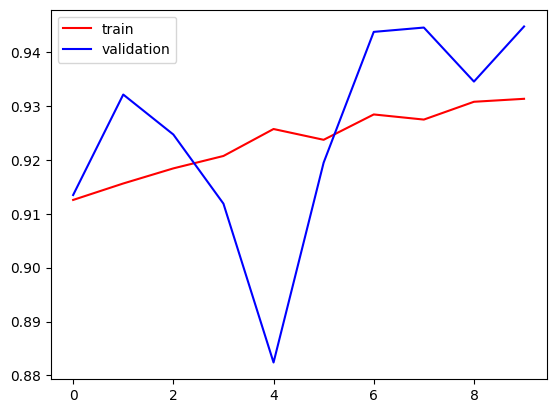

In [ ]:
import matplotlib.pyplot as plt

plt.plot(aug_model.history['accuracy'],color = 'red', label = 'train')
plt.plot(aug_model.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

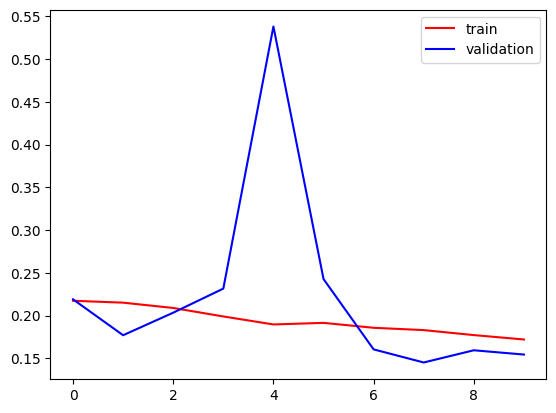

In [ ]:
plt.plot(aug_model.history['loss'],color = 'red', label = 'train')
plt.plot(aug_model.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()